In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Build the model

In [ ]:

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Flatten -> ReLU
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Softmax
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reshape

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

Shuffling


In [ ]:
indices = np.arange(len(X_train))
np.random.seed(42)
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7549 - loss: 0.8121 - val_accuracy: 0.9592 - val_loss: 0.1411
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9668 - loss: 0.1097 - val_accuracy: 0.9698 - val_loss: 0.1025
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9753 - loss: 0.0841 - val_accuracy: 0.9718 - val_loss: 0.0928
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9779 - loss: 0.0700 - val_accuracy: 0.9713 - val_loss: 0.0909
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9826 - loss: 0.0573 - val_accuracy: 0.9808 - val_loss: 0.0628
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9866 - loss: 0.0454 - val_accuracy: 0.9814 - val_loss: 0.0609
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9881 - loss: 0.0394 - val_accuracy: 0.9772 - val_loss: 0.0708
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9881 - loss: 0.0372 - val_accuracy: 0

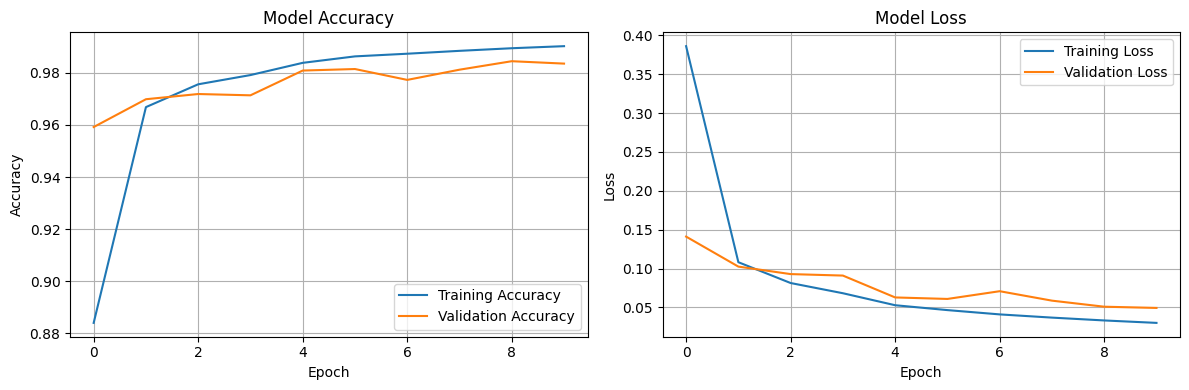

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9817 - loss: 0.0671

Test accuracy: [0.051936909556388855, 0.9857000112533569]


I noticed a slight increase on validation lossbetween epochs 6 - 8. The model loss was decreasing the same as the training loss but towards epoch 5 slower decay. My question is, is my model overfitting in that range, is it normal for it to flunctiate? Can I tune any hyperparamters to improve upon?



*   Epochs
*   Batch Size
*   Layers: I noticed my third layer is the same as the 2nd one, either take it out or increase by 2x
*   Strides?
*   Optimizer: maybe try RMSprop



# Understand these concepts

- padding
- batch normiilaization
- rotating the image
- dropout
